<a href="https://colab.research.google.com/github/leadeeerq/machine-learning/blob/main/ML15_Gini_entropia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from scipy.stats import entropy

sns.set(font_scale=1.3)

In [ ]:
p = np.arange(0.01, 1.0, 0.1)
q = 1 - p

In [ ]:
p

array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91])

In [ ]:
q

array([0.99, 0.89, 0.79, 0.69, 0.59, 0.49, 0.39, 0.29, 0.19, 0.09])

In [ ]:
pq = np.c_[p, q]
pq

array([[0.01, 0.99],
       [0.11, 0.89],
       [0.21, 0.79],
       [0.31, 0.69],
       [0.41, 0.59],
       [0.51, 0.49],
       [0.61, 0.39],
       [0.71, 0.29],
       [0.81, 0.19],
       [0.91, 0.09]])

In [ ]:
entropy(pq[0])

0.056001534354847345

In [ ]:
entropies = [entropy(pair, base=2) for pair in pq]
entropies[:10]

[0.08079313589591118,
 0.499915958164528,
 0.7414827399312738,
 0.8931734583778568,
 0.9765004687578241,
 0.99971144175281,
 0.9647995485050871,
 0.8687212463394045,
 0.7014714598838973,
 0.43646981706410287]

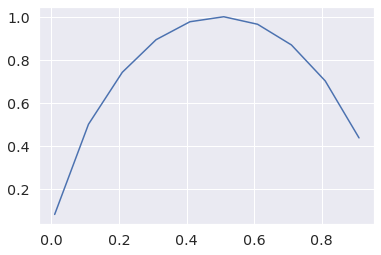

In [ ]:
plt.plot(p, entropies)

#Rozważenie danych

| ID | Dochód | Liczba osób w gospodarstwie | Wiarygodność | Udzielenie pożyczki |
|----|--------|-----------------------------|--------------|---------------------|
| 1  | niski  | 1                           | niska        | 0                   |
| 2  | niski  | 3                           | niska        | 0                   |
| 3  | średni | 4                           | niska        | 0                   |
| 4  | wysoki | 3                           | średnia      | 0                   |
| 5  | wysoki | 4                           | wysoka       | 1                   |
| 6  | niski  | 4                           | niska        | 0                   |
| 7  | średni | 2                           | średnia      | 1                   |
| 8  | wysoki | 3                           | wysoka       | 1                   |
| 9  | średni | 5                           | niska        | 0                   |
| 10 | średni | 1                           | wysoka       | 1                   |


Rozkład zmiennej Udzienie pożyczki:

| Udzielenie pożyczki | 0    | 1    |
|---------------------|------|------|
| $p_{i}$               | 6/10 | 4/10 |


Wzór na entropię:
###  $E = - \sum_{i=1}^{n}p_{i} \cdot log_{2}p_{i}$

Entropia po podziale:

###  $E_{after}  = \sum_{i=1}^{m} \frac{S_{i}}{S}Entropia(S_{i})$

gdzie 
$S$ - podział
$m$ - liczba podziałów

In [ ]:
# pk = [0.6, 0.4]
# entropy(pk)
entropy([0.6, 0.4], base = 2)

0.9709505944546688

In [ ]:
entropy([0.5, 0.5], base = 2)

1.0

In [ ]:
entropia = -(6/10 * np.log2(6/10) + (4/10) * np.log2(4/10))
entropia

0.9709505944546686

# Rozkład zmiennej `Wiarygodność`

|         | udział | udzielenie pożyczki = 0 | udzielenie pożyczki = 1 |  Entropia
|---------|--------|-------------------------|-------------------------|--------|
| niska   | 5/10   | 1                       | 0                       | 0
| średnia | 2/10   | 1/2                     | 1/2                     | 1
| wysoka  | 3/10   | 0                       | 1                       | 0

Entropia po podziale

In [ ]:
entropia_wiarygodnosc = 5/10 * 0 + 2/10 * 1 + 3/10 * 0
entropia_wiarygodnosc

0.2

### Rozkład zmiennej  `Dochód`

|        | udział | udzielenie pożyczki = 0 | udzielenie pożyczki = 1 | Entropia
|--------|--------|-------------------------|-------------------------|----------|
| niski  | 3/10   | 1                       | 0                       |0
| sredni | 4/10   | 2/4                     | 2/4                     |1
| wysoki | 3/10   | 1/3                     | 2/3                     | 0.9183

Entropia po podziale

In [ ]:
entropia_dochod = 3/10 * 0 + 4/10 * 1 + 3/10 * 0.9183
entropia_dochod

0.67549

#Zysk informacyjny


$IG (Information\ Gain) = Entropia\ przed\ podziałem - Entropia\ po\ podziale$

In [ ]:
ig_wiarygodnosc = entropia - entropia_wiarygodnosc
ig_dochod = entropia - entropia_dochod

print('Zysk informacyjny (IG): wiarygodność:', ig_wiarygodnosc)
print('Zysk informacyjny (IG): dochód:', ig_dochod)

Zysk informacyjny (IG): wiarygodność: 0.7709505944546686
Zysk informacyjny (IG): dochód: 0.29546059445466855
